# Задача 7.3

In [1]:
import scipy.stats as sps
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


$X = (X_1, ... X_n)$ - выборка из распределения $Cauchy(1)$

In [2]:
n = 100
sample = sps.cauchy.rvs(loc=0, scale=1, size=n)

Рассмотрим параметрическую модель $X_1,...X_n$ - выборка из $N(\theta, 1)$. Сопряженное распределение для такой модели - $N(a, \sigma^2)$. Байесовская оценка - $\frac{a + \sum_{i=1}^n X_i \cdot \sigma^2}{\sigma^2\cdot n + 1}$ , оценка максимального правдоподобия - $\overline{X}$ (задача 8.3)

In [4]:
s = np.arange(1, n + 1, 1)
max_likelihood_est = sample.cumsum() / s

Построим графики зависимости плотности априорного распределения для разных параметров $a, \sigma^2$ от n:

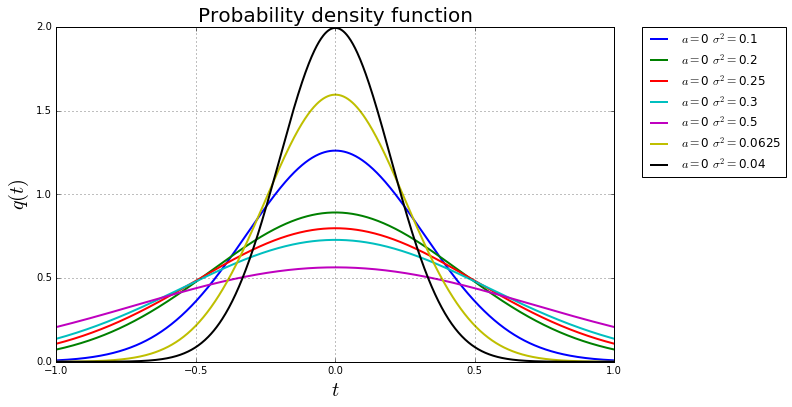

In [14]:
x = np.linspace(-1, 1, 1000)

a = 0
sigma_2 = np.array([0.1, 0.2, 0.25, 0.3, 0.5, 0.0625, 0.04])


plt.figure(figsize=(10, 6))

for i in range(7):
    plt.plot(x, sps.norm.pdf(x, loc=a, scale=sqrt(sigma_2[i])), linewidth = 2, label = r'$a = $' + str(a) + 
             r' $\sigma^2 = $' + str(sigma_2[i]))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim(-1, 1)
plt.ylim(0, 2)
plt.xlabel('$t$', fontsize = 20)
plt.ylabel('$q(t)$', fontsize = 20)
plt.title('Probability density function', fontsize = 20)
plt.grid() 
plt.show()

Из правила трех сигм, вероятность попадания в отрезок $(a - 3\sigma; a + 3\sigma)$ - 0,9973, в отрезок $(a - 2\sigma; a + 2\sigma)$ для нормального распределения - 0.95. Тогда параметры априорного распределения, при условии, что $|\theta| < 0.5$ с вероятностью не менее 0.95 - $a = 0, \sigma = 0.25$. Проверим, что вероятность попадания в отрезок $(a - 2\sigma; a + 2\sigma)$ при таких значениях параметров действительно не менее 0.95:

In [2]:
print sps.norm.cdf(0.5, loc=0, scale=0.25) - sps.norm.cdf(-0.5, loc=0, scale=0.25)

0.954499736104


Найдем баесовскую оценку для выборки $X_1,...X_n$:

In [15]:
sigma = 0.25
bayesian_estimation = sample.cumsum() * (sigma ** 2) / ((sigma ** 2) * s + 1)

Построим графики абсолютной величины отклонения этих оценок от истинного значения параметра $\theta = 0$:

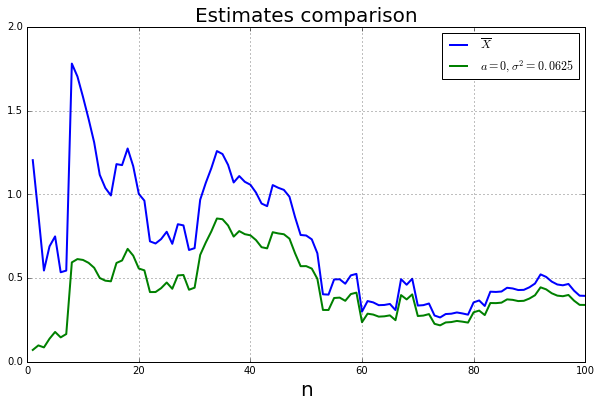

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(s, abs(max_likelihood_est), linewidth=2,label=r'$\overline{X}$')
plt.plot(s, abs(bayesian_estimation), linewidth=2, label=r'$a = 0, \sigma^2 = 0.0625$')

plt.legend()
plt.xlim((0, n))
plt.ylim((0, 2))
plt.xlabel('n', fontsize = 20)
plt.title('Estimates comparison', fontsize = 20)
plt.grid() 

Из графика видно, что абсолютные отклонения оценок от истинного значения параметра велики, значит, параметрическая модель для данного распределения выбрана неверно.